In [1]:
vm_filename = "FSG_cleaned.txt" # "FSG_cleaned_small.txt"
vm_text = open(vm_filename).read()

In [2]:
chars = sorted(list(set(vm_text)))

print("Number of chars: ", len(chars))
print("Chars list: ", chars)

Number of chars:  36
Chars list:  ['\n', ',', '-', '0', '1', '2', '3', '4', '6', '7', '8', '9', '=', '?', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'W', 'X', 'Y', 'Z']


In [3]:
text_len = len(vm_text)
from collections import Counter
counter = Counter(vm_text)
frequentcy = {k: v/text_len for k, v in counter.items()}

In [4]:
import pandas as pd

char_df = pd.DataFrame.from_dict(counter,  orient = 'index').reset_index()
char_df.columns = ["Char", "Occurance"]

char_df['Frequency'] = char_df['Occurance'] / text_len

In [5]:
char_df.sort_values('Frequency', ascending=False)

,Char,Occurance,Frequency
5,",",29297,0.161298
12,O,21165,0.116526
14,C,17126,0.094289
2,G,15614,0.085965
3,A,12732,0.070097
15,8,11588,0.063799
19,T,9935,0.054698
6,D,9654,0.053151
7,E,9121,0.050217
8,R,6404,0.035258


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]


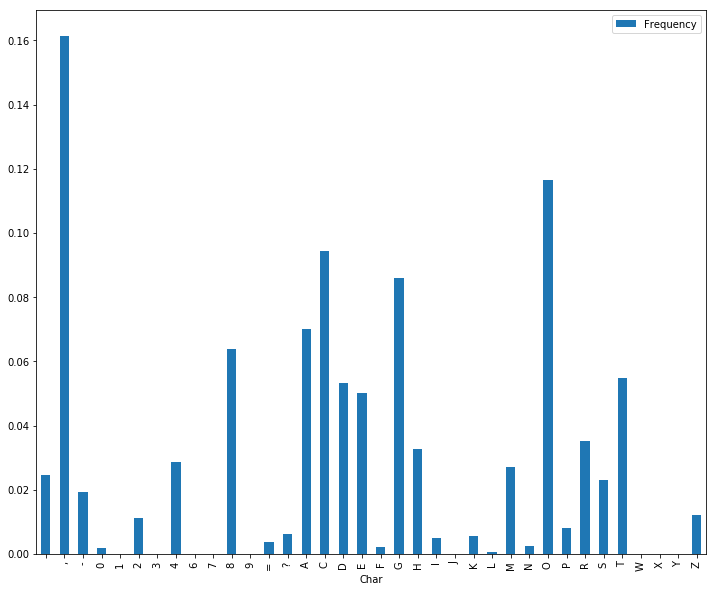

In [8]:
char_df.sort_values('Char').plot(kind='bar', x="Char", y="Frequency")

In [9]:
import re
vm_text_line = re.sub('\n', '', vm_text)
vm_text_only_words = re.sub('-|=', ',', vm_text_line)
vm_text_words = vm_text_only_words.split(",")
words = sorted(list(set(vm_text_words)))


In [10]:
words_len = len(words)
words_in_text = len(vm_text_words)

unclean_re = re.compile('\\?')
clean_words = [x for x in words if not unclean_re.match(x)]

print("Number of words in manuscript: ", words_in_text)
print("Number of unique words: ", words_len)
print("Number of unique words: ((without ?): ", len(clean_words))

Number of words in manuscript:  33523
Number of unique words:  7208
Number of unique words: ((without ?):  7103


In [11]:
word_counter = Counter(vm_text_words)

word_df = pd.DataFrame.from_dict(word_counter,  orient = 'index').reset_index()
word_df.columns = ["Char", "Occurance"]

word_df['Frequency'] = word_df['Occurance'] / text_len

In [16]:
word_df.sort_values('Frequency', ascending=False)[:10]

,Char,Occurance,Frequency,Length
31,8AM,958,0.005274,3
1490,TC8G,489,0.002692,4
472,4ODAM,430,0.002367,5
1500,SC8G,424,0.002334,4
164,OE,422,0.002323,2
84,TOE,387,0.002131,3
253,AM,358,0.001971,2
119,TCG,339,0.001866,3
1502,4ODCC8G,299,0.001646,7
136,8AR,292,0.001608,3


In [13]:
word_df['Length'] = [len(x) for x in word_df['Char']]

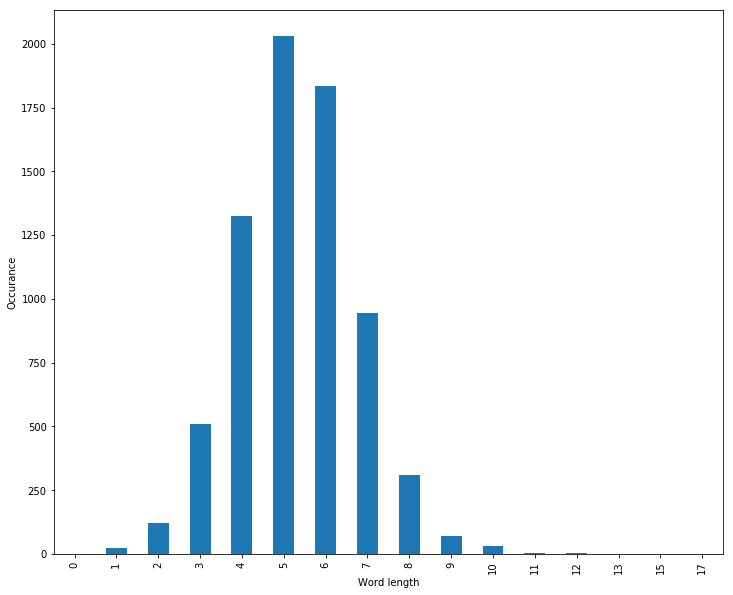

In [14]:
word_df.Length.value_counts().sort_index().plot.bar()
plt.xlabel('Word length')
plt.ylabel('Occurance')

In [ ]:
## connection between 2 chars

In [28]:
even_two = re.findall(r'.{1,2}',vm_text,re.DOTALL)
odd_two = re.findall(r'.{1,2}',vm_text[1:],re.DOTALL)
two_word = even_two + odd_two

In [31]:
two_word_counter = Counter(two_word)

two_word_df = pd.DataFrame.from_dict(two_word_counter,  orient = 'index').reset_index()
two_word_df.columns = ["Char", "Occurance"]

two_word_df['Frequency'] = two_word_df['Occurance'] / len(two_word)

In [33]:
two_word_df.sort_values('Frequency', ascending=False)[:20]

,Char,Occurance,Frequency
25,"G,",12085,0.066535
19,8G,6256,0.034443
37,",O",6099,0.033579
52,OD,5500,0.030281
27,",T",5228,0.028783
147,4O,5070,0.027913
18,OE,4883,0.026884
5,"E,",4854,0.026724
154,",4",4669,0.025706
268,C8,4650,0.025601


In [34]:
## connection between 3 chars

In [39]:
fist_three = re.findall(r'.{1,3}',vm_text,re.DOTALL)
second_three = re.findall(r'.{1,3}',vm_text[1:],re.DOTALL)
third_three = re.findall(r'.{1,3}',vm_text[2:],re.DOTALL)
three_word = fist_three + second_three + third_three

three_word_counter = Counter(three_word)

three_word_df = pd.DataFrame.from_dict(three_word_counter,  orient = 'index').reset_index()
three_word_df.columns = ["Char", "Occurance"]

three_word_df['Frequency'] = three_word_df['Occurance'] / len(three_word)



In [40]:
three_word_df.sort_values('Frequency', ascending=False)[:20]

,Char,Occurance,Frequency
73,"8G,",5460,0.030061
279,",4O",4560,0.025106
22,"AM,",4105,0.022601
986,C8G,3911,0.021532
114,"CG,",3372,0.018565
333,"G,4",3368,0.018543
351,4OD,3058,0.016836
7,"OE,",3039,0.016732
147,",TC",2440,0.013434
32,"G,O",2184,0.012024


In [42]:
vm_text_words[:10]

['FGAG2',
 'GDAE',
 'AR',
 'GHAM',
 'SOE',
 'SORG',
 '0D0RC2',
 'GDOR',
 'SOE8G',
 '2ORG']

In [52]:
word_pairs = [ x+','+y for x,y in zip(vm_text_words[0::2], vm_text_words[1::2]) ] + [ x+','+y for x,y in zip(vm_text_words[1::3], vm_text_words[2::4]) ]
word_pairs_counter = Counter(word_pairs)

word_pairs_df = pd.DataFrame.from_dict(word_pairs_counter,  orient = 'index').reset_index()
word_pairs_df.columns = ["Char", "Occurance"]

word_pairs_df['Frequency'] = word_pairs_df['Occurance'] / len(word_pairs)

In [55]:
word_pairs_df.sort_values('Frequency', ascending=False)[:20]

,Char,Occurance,Frequency
214,"TOE,8AM",27,0.001074
1919,"8AM,8AM",19,0.000756
2985,"SC8G,4ODAM",17,0.000676
571,"8G,8AM",15,0.000597
5839,"OE,SC8G",14,0.000557
5546,"4ODCCG,4ODCCG",13,0.000517
5357,"4OE,TC8G",12,0.000477
2029,"8AM,TCG",12,0.000477
1624,"OE,8AM",11,0.000438
3110,"OE,TC8G",11,0.000438
